In [1]:
import pandas as pd
import numpy as np

In [16]:
import matplotlib.pyplot as plt

## Annonimize collateral data

In [2]:
!open /Users/miguel/Documents/collateral.xlsx

In [3]:
df = pd.read_excel('/Users/miguel/Documents/collateral.xlsx', sheetname='Sheet1')

In [4]:
cps = sorted(df.CP.append(df.m).unique())

In [5]:
renames = dict( (v,'C{x}'.format(x=i)) for i,v in enumerate(cps))
f_rename = lambda x: renames[x]
df_anon = pd.DataFrame({'source': df.m.apply(f_rename),
                        'target': df.CP.apply(f_rename),
                        'weight': (df.Exp / df.Exp.sum() * 12345)})
df_anon.to_csv('collateral.csv')

## Read collateral

In [6]:
import networkx as nx

In [7]:
import pandas as pd
df_anon = pd.read_csv('collateral.csv')

In [8]:
credit_net = nx.from_pandas_dataframe(df_anon, 'source', 'target', edge_attr='weight', create_using=nx.DiGraph())

In [9]:
x0 = [n for n in credit_net.nodes_iter() if credit_net.in_degree(n) == 0]
x1 = [n for n in credit_net.nodes_iter() if credit_net.in_degree(n) > 0 and credit_net.out_degree(n) > 0]
x2 = [n for n in credit_net.nodes_iter() if credit_net.out_degree(n) == 0]

In [10]:
!head -n 10 collateral.csv

,source,target,weight
0,C4,C290,0.38891322199382444
1,C6,C204,0.0
2,C6,C258,0.6860975724395493
3,C7,C81,0.779148438005005
4,C7,C269,5.32111785262272
5,C7,C391,4.772858227112057
6,C7,C310,4.931357260127372
7,C7,C441,0.6099054365476856
8,C7,C92,9.50829186163568


In [11]:
%matplotlib notebook

pos = dict()
pos.update( (n, (1, i*30)) for i, n in enumerate(x0) ) # put pure posters on left
pos.update( (n, (2, i*20+1200)) for i, n in enumerate(x1) ) # put hybrids in the middle
pos.update( (n, (3, i*10)) for i, n in enumerate(x2) ) # put pure issuers on right

nx.draw(credit_net, pos=pos, alpha=0.02, node_size=20)

<IPython.core.display.Javascript object>

In [12]:
df_degs = pd.DataFrame({'in': credit_net.out_degree(weight= 'weight'),
                        'out': credit_net.in_degree(weight= 'weight')})

In [13]:
df_degs.ix[x2]

,in,out
C84,0.0,20.682364
C155,0.0,2.618571
C81,0.0,101.571547
C552,0.0,0.719464
C234,0.0,0.008388
C404,0.0,0.405836
C453,0.0,0.873238
C484,0.0,19.598349
C424,0.0,4.404158
C303,0.0,2.204861


<IPython.core.display.Javascript object>


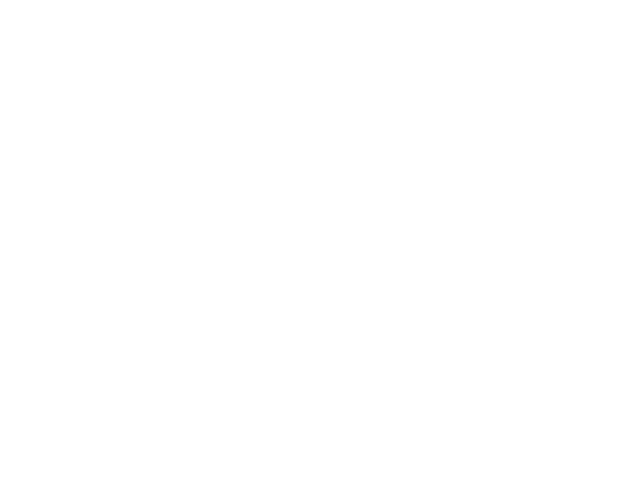

<IPython.core.display.Javascript object>


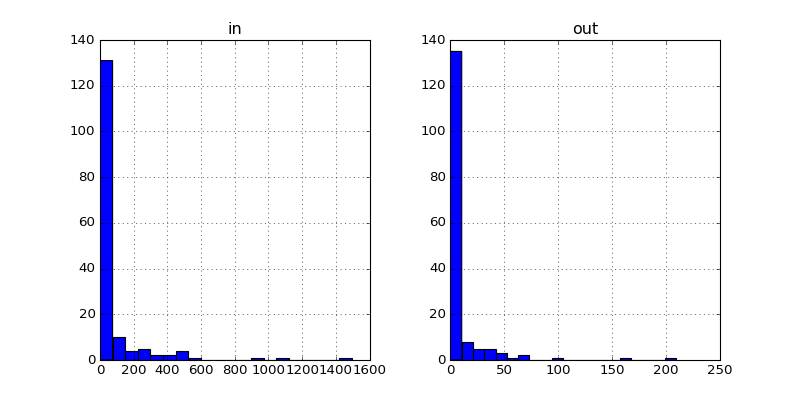

In [17]:
plt.figure('Bipartite-like structure')
df_degs.ix[df_degs['in'] > 0].hist(bins=20, figsize=(10,5));

In [ ]:
%matplotlib notebook
df.Exp.ix[df.Exp>0].plot.hist(bins=100)